### Image Resizing
- Adjusting image dimension
- Aspect ration may change

### Image Scaling
- Adjusting image dimension but maintaining aspect ratio.
- Switching from HD to full HD
- Aspect ration will be same
- up-scale and down-scale based on requirment
  
### Interpolation
- Determines how values are computed when decreasing or increasing the size of an image.

- **cv2.INTER_CUBIC**: consider nearest 16 pixels to calculate the new pixel value, providing smoother results.
- **cv2.INTER_AREA**: calculate average pixels value in the area of the original image that maps to a single pixel in the resized image.
- **cv2.INTER_LANCZOS4**: (Lancos kernel) formula to consider the nearest 8x8 pixel neighborhood for each pixel. Produce high quality results but computationally expensive.
- **cv2.INTER_NEAREST**: Simplest method. Each pixel in the resized image is assigned the value of the nearest pixel in the original image
- **cv2.INTER_LINEAR**: Nearest four average

Standard Resolution - 640x480


In [2]:
import cv2
import matplotlib.pyplot as plt 

In [5]:
image = cv2.imread("./images/img_2.jpg")

In [6]:
print(image)

[[[ 52  94  46]
  [ 51  93  45]
  [ 51  93  45]
  ...
  [ 74 127  70]
  [ 74 123  67]
  [ 71 120  64]]

 [[ 54  96  48]
  [ 53  95  47]
  [ 52  94  46]
  ...
  [ 75 129  69]
  [ 81 132  72]
  [ 83 134  74]]

 [[ 55  97  49]
  [ 53  95  47]
  [ 52  94  46]
  ...
  [ 73 130  62]
  [ 78 131  64]
  [ 80 133  66]]

 ...

 [[ 96 147 179]
  [ 95 146 178]
  [ 93 144 176]
  ...
  [ 63 137  89]
  [ 62 133  93]
  [ 63 133  96]]

 [[ 96 147 179]
  [ 94 145 177]
  [ 92 143 176]
  ...
  [ 60 134  86]
  [ 58 129  89]
  [ 60 130  93]]

 [[ 94 145 177]
  [ 92 143 175]
  [ 90 141 174]
  ...
  [ 57 131  83]
  [ 55 126  86]
  [ 58 128  91]]]


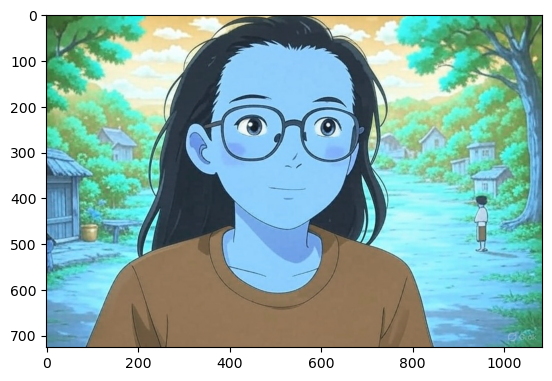

In [11]:
plt.imshow(image)

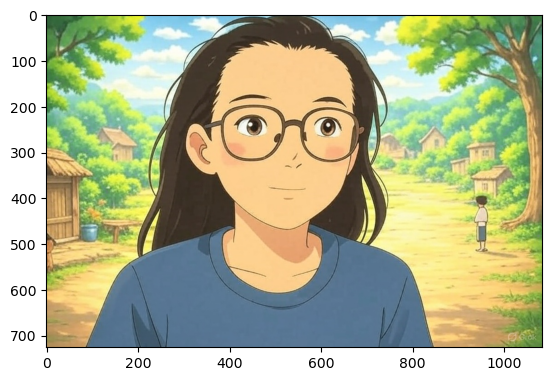

In [12]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

In [9]:
## Image Resizing
print(image_rgb.shape)

(726, 1084, 3)


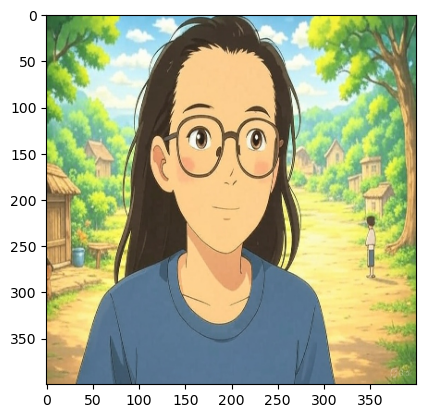

In [10]:
new_height,new_width = 400,400
resized_image = cv2.resize(image_rgb,(new_height,new_width))
plt.imshow(resized_image)

(363, 542, 3)


Text(0.5, 1.0, 'Scaled Image')

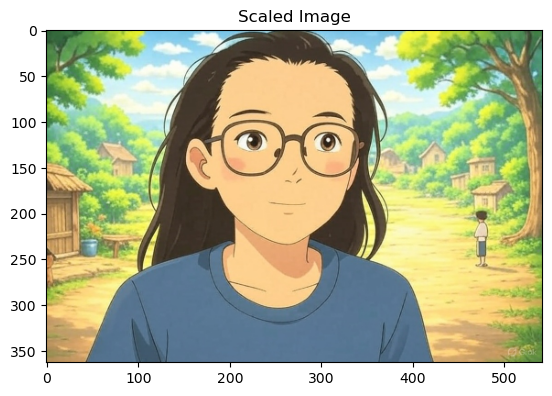

In [16]:
## Image Scaling
scale_percentage = 50
s_width = int(image_rgb.shape[1]*scale_percentage/100)
s_height = int(image_rgb.shape[0]*scale_percentage/100)

scaled_image = cv2.resize(image_rgb, (s_width,s_height),interpolation=cv2.INTER_AREA)
print(scaled_image.shape)
plt.imshow(scaled_image)
plt.title("Scaled Image")

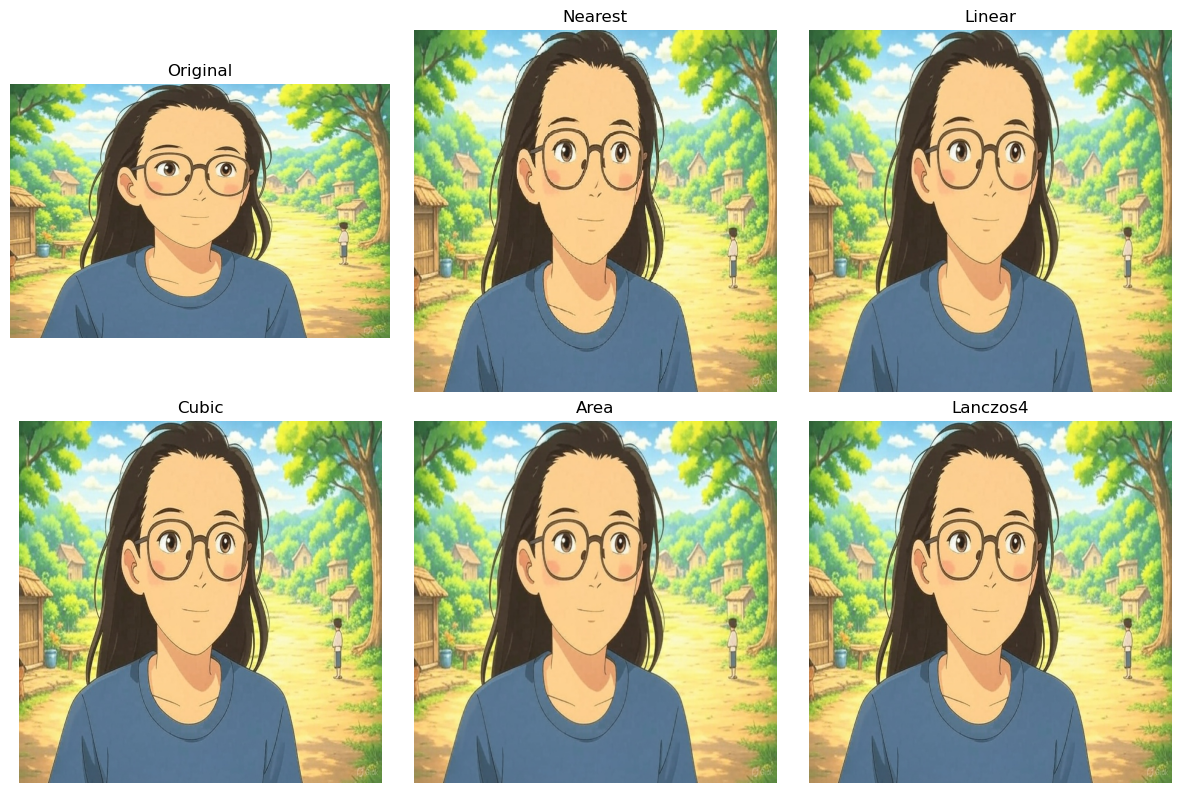

In [17]:
#Interpolation

# image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
resize_width = 600
resize_height = 600

# interpolation methods
methods = {
    "Nearest":cv2.INTER_NEAREST,
    "Linear":cv2.INTER_LINEAR,
    "Cubic":cv2.INTER_CUBIC,
    "Area":cv2.INTER_AREA,
    "Lanczos4":cv2.INTER_LANCZOS4
}

resized_images = {}
for name, method in methods.items():
    scaled_image = cv2.resize(image_rgb, (resize_width, resize_height),interpolation=method)
    resized_images[name] = scaled_image
    cv2.imwrite(f"./{name}.jpg",resized_images[name])

plt.figure(figsize=(12,8))

# Original Image
plt.subplot(2,3,1)
plt.imshow(image_rgb)
plt.title("Original")
plt.axis('off')


for i,(name,resized_image) in enumerate(resized_images.items(),start=2):
    plt.subplot(2,3,i)
    plt.imshow(resized_image)
    plt.title(name)
    plt.axis('off')

plt.tight_layout()
plt.show()
